# group 28, Jiangqiu Shen, Lynn Chen

# Project3
## overall introduction
1. we first try to have a little glance at the naive bayes classifier.
1. then we train the weight by myself and show the mean and the derivation by ouselves
1. we design 3\*10 diffent classifier for 3 different lamda and 10 different class
1. we design the loss function and gradient function.
1. we use them to train my model, until the loss dons't change significantly(<0.1)
1. we predict the testing data. and plot the table of correctness of each digit and eahc lambda

In [3]:
import idx2numpy
import numpy as np

from matplotlib import pyplot as plt
import datetime
from scipy.stats import norm
from sklearn.naive_bayes import GaussianNB

train_pic=idx2numpy.convert_from_file("train-images-idx3-ubyte")
train_label=idx2numpy.convert_from_file("train-labels-idx1-ubyte")

test_pic=idx2numpy.convert_from_file("t10k-images-idx3-ubyte")
test_label=idx2numpy.convert_from_file("t10k-labels-idx1-ubyte")




In [4]:
gnb=GaussianNB()
predictor=gnb.fit(train_pic.reshape(-1,784),train_label)
y_pred=predictor.predict(test_pic.reshape(-1,784))
for i in range(10):
    print("number:%d, size: %d, correct: %d"%(i,(test_label==i).sum(), (y_pred[test_label==i]==test_label[test_label==i]).sum()))

number:0, size: 980, correct: 870
number:1, size: 1135, correct: 1079
number:2, size: 1032, correct: 266
number:3, size: 1010, correct: 353
number:4, size: 982, correct: 168
number:5, size: 892, correct: 44
number:6, size: 958, correct: 895
number:7, size: 1028, correct: 280
number:8, size: 974, correct: 648
number:9, size: 1009, correct: 955


## above code have a quick glance at the naive bayes classifier

In [5]:


upxic=np.zeros([10,784])
number=np.zeros(10)
for data,label in zip(train_pic,train_label):
    upxic[label]+=data.reshape(-1)
    number[label]+=1
for i in range(10):
    upxic[i]/=number[i]


number=np.zeros(10)

deltpxic=np.zeros([10,784])
for data,label in zip(train_pic,train_label):
    deltpxic[label]+=(data.reshape(-1)-upxic[label])**2
    number[label]+=1
for i in range(10):
    deltpxic[i]/=number[i]



# Code Explanation
above code calculate the mean and the deviation

# Start question 1

to show the insight of the trainned model, we first show the mean value


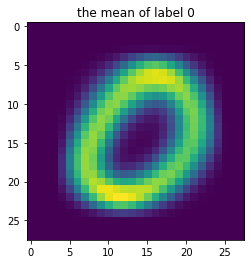

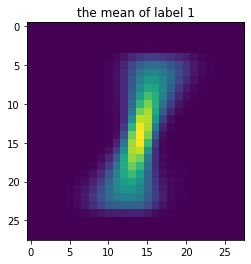

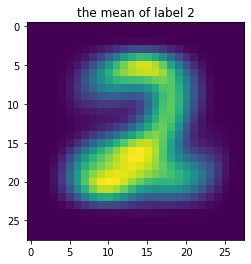

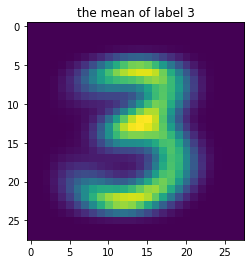

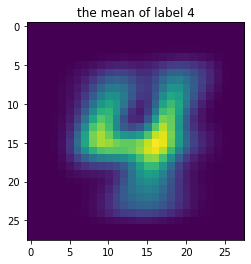

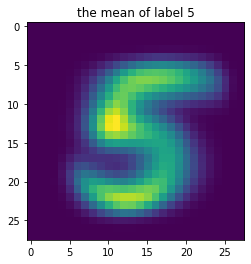

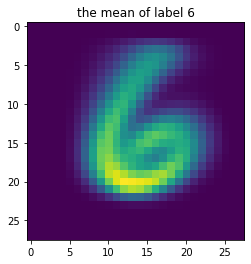

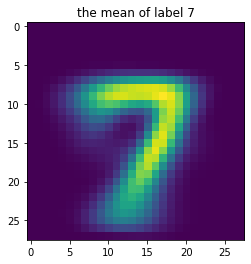

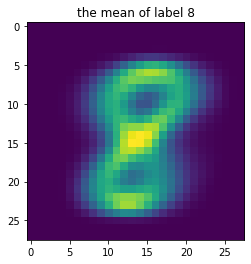

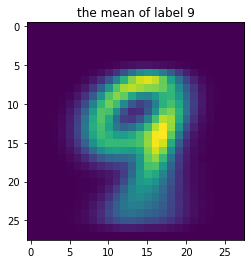

next we show the deviation


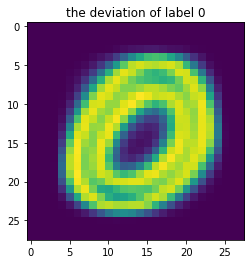

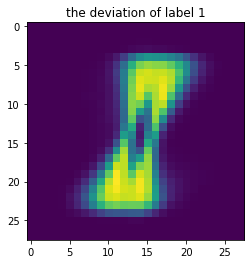

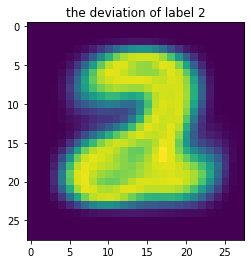

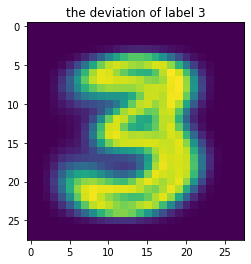

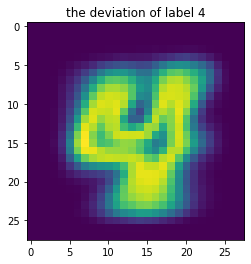

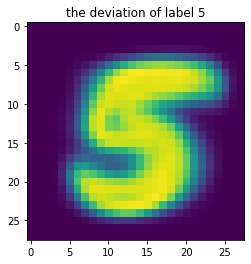

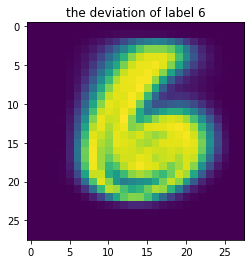

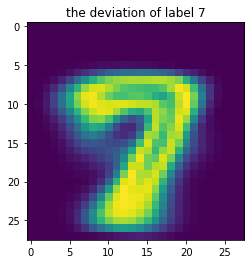

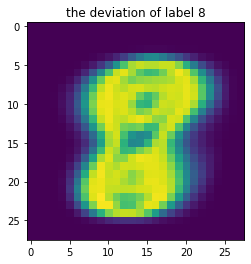

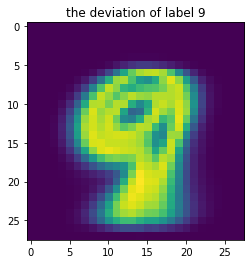

<Figure size 432x288 with 0 Axes>

In [6]:

print("to show the insight of the trainned model, we first show the mean value")
for i in range(10):
    img=plt.imshow(upxic[i].reshape(28,28))
    plt.title("the mean of label %d"%i)
    plt.show(img)
    plt.clf()
print("next we show the deviation")
for i in range(10):
    img=deltpxic[i].reshape(28,28)
    img=img*(255/img.max())
    img=plt.imshow(img)
    plt.title("the deviation of label %d"%i)
    plt.show(img)
    plt.clf()
        
    

# Figure 
above figure shows the mean and deviation of each digital we trained

for *mean* value, we can clealy see that the *shape is same as the digit*
for *deviation* value, which higher means this area change a alot in this class. So we can see that, at the *edge* of each digit, the deviation is *higher*, which total make sense

In [7]:

def loss_function(x,y,w,l):
        temp=np.dot(x,w.T) #x: n*d, w.T: d*1, result: n*1 
        temp=-y*temp # y: n, temp:n return n
        temp=np.exp(temp)+1 
        temp=np.log(temp).sum() # return 1
        temp=temp+(l/2)*(w*w).sum()
        return temp
        pass
def gradient(x,y,w,l):
        n=len(y)
        d=x.shape[1]

        temp_up=np.dot(x,w.T) #x: n*d, w.T: d*1, result: n*1 
        temp_up=-y*temp_up # y: n, temp:n return n
        temp_up=np.exp(temp_up)

        temp_down=temp_up+1
        temp_up=-y.reshape(n,1)*x*temp_up.reshape(n,-1)
        temp=temp_up/temp_down.reshape(n,1)
        temp=temp.sum(axis=0) #return d data
        temp=temp+l*w
        return temp
        pass





# code explanation
above code calculate the loss function and graidient function for later trainning

# Start question 2

In [9]:
n=len(train_pic)
nt=len(test_pic)
d=785
train_pic=train_pic.reshape(n,-1).astype(np.float64)
test_pic=test_pic.reshape(nt,-1).astype(np.float64)
all_pic=np.append(train_pic,test_pic,axis=0)
all_pic=all_pic/all_pic.max()
train_pic=all_pic[0:n]
test_pic=all_pic[n:]
train_pic=train_pic[0:1000]
train_label=train_label[0:1000]
n=1000

ones=np.array([[1] for i in range(n)])
train_pic_with_bias=np.append(ones,train_pic,axis=1)
reg_arg=np.array([0.001,0.0001,0.00001])
weight=np.ndarray([3,10,d])
weight[:,:,:]=0
l=0
new_label=np.ndarray([10,n])
weight=np.load("weight.npy")
for i in range(10):
    new_label[i][train_label==i]=1
    new_label[i][train_label!=i]=-1
for l in range(3):# for diffrent regulazition
    for j in range(10): #train 10 classifier
        last_lost=0
        for i in range(10000):
            if i%100==0:
                this_loss=loss_function(train_pic_with_bias,new_label[j],weight[l][j],reg_arg[l])
                if last_lost!=0 and np.abs(this_loss-last_lost)<0.1:
    
                    break
                else:
                    last_lost=this_loss

            weight[l][j]=weight[l][j]-0.0003*gradient(train_pic_with_bias,new_label[j],weight[l][j],reg_arg[l])

np.save("weight.npy",weight)


# Data Explanation
above code use gradient decent to calculate the best model. when the loss changed slowly, we stoped the trainning. we trained 3\*10 different models(for diffenrent lambda and diffenrent digital).

In [10]:

total_t=np.zeros([3,10])
correct=np.zeros([3,10])
def predict(input,weight):
    max_index=-1
    max_value=0
    for i in range(10):
        propability=1/(np.exp(-np.dot(input,weight[i].T))+1)
        if propability>max_value:
            max_value=propability
            max_index=i
    return max_index    



# Code explanation
Above code predict one input by using all the 10 differnt classifier, to find the max likely hood.

In [11]:
ones=np.array([[1] for i in range(nt)])
test_pic_with_bias=np.append(ones,test_pic,axis=1)
for l in range(3):
    for i in range(nt):
        out=predict(test_pic_with_bias[i],weight[l])
        if out==test_label[i]:
            total_t[l][test_label[i]]+=1
            correct[l][test_label[i]]+=1
        else:
            total_t[l][test_label[i]]+=1

# Code explanation
Above code collect the predict information

In [12]:
print("-----------------the correctness for each digit---------------------")
print("--------------------------------------------------------------------")

for i in range(10):
    print("for digit %2d | total number :%4d | correct: %4d | accuracy: %2.2f%% " %(i,total_t[0][i],correct[0][i],100*(float)(correct[0][i])/(float)(total_t[0][i])))
print("--------------------------------------------------------------------\n\n")
print("-----------------the correctness for all digit-----------------------")
print("for digit all| total number :%4d | correct: %4d | accuracy: %2.2f%% " %(total_t[0].sum(),correct[0].sum(),100*(float)(correct[0].sum())/(float)(total_t[0].sum())))
print("--------------------------------------------------------------------\n\n")

print("-----------------the correctness for each reg---------------------")
print("--------------------------------------------------------------------")

for l in range(3):
    print("for reg %.5f | total number :%4d | correct: %4d | accuracy: %2.2f%% " %(reg_arg[l],total_t[l].sum(),correct[l].sum(),100*(float)(correct[l].sum())/(float)(total_t[l].sum())))



-----------------the correctness for each digit---------------------
--------------------------------------------------------------------
for digit  0 | total number : 980 | correct:  944 | accuracy: 96.33% 
for digit  1 | total number :1135 | correct: 1092 | accuracy: 96.21% 
for digit  2 | total number :1032 | correct:  890 | accuracy: 86.24% 
for digit  3 | total number :1010 | correct:  763 | accuracy: 75.54% 
for digit  4 | total number : 982 | correct:  827 | accuracy: 84.22% 
for digit  5 | total number : 892 | correct:  666 | accuracy: 74.66% 
for digit  6 | total number : 958 | correct:  861 | accuracy: 89.87% 
for digit  7 | total number :1028 | correct:  922 | accuracy: 89.69% 
for digit  8 | total number : 974 | correct:  752 | accuracy: 77.21% 
for digit  9 | total number :1009 | correct:  786 | accuracy: 77.90% 
--------------------------------------------------------------------


-----------------the correctness for all digit-----------------------
for digit all| total 

# Final result
we can see that for each digit, we achived 77.32% to  96.33% accuracy. the overall accuracy is 85.03, which is same while using differnt regulazition method.

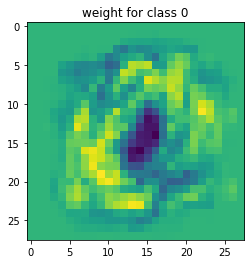

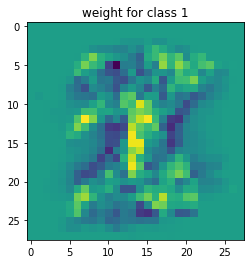

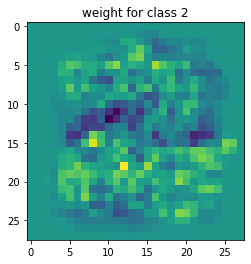

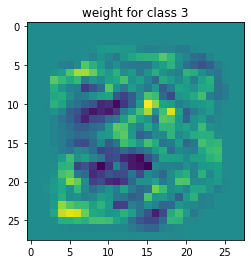

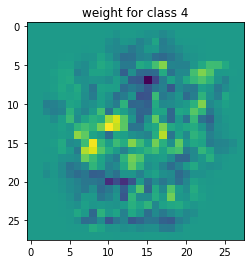

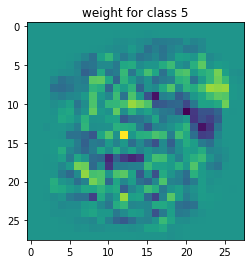

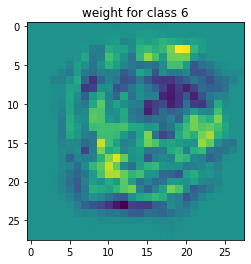

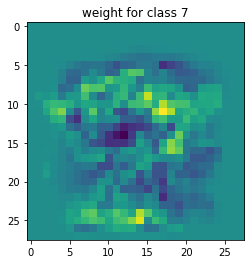

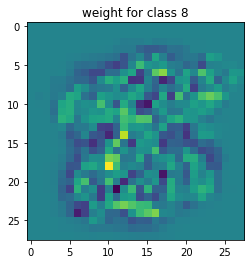

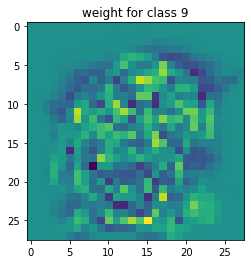

In [17]:
# start to show the weight.
for i in range(10):
    weight_to_show=weight[0][i][1:].reshape(28,28)
    plt.clf()
    weight_to_show=weight_to_show-weight_to_show.min() 
    weight_to_show=weight_to_show*(255/weight_to_show.max())
    img=plt.imshow(weight_to_show)
    plt.title("weight for class %d"%i)
    plt.show(img)

# plot exlanation
those weight show which area is *positive* or *negtive* for our classifying. for example, for digit 0, the cycle is positive for classifier to think it 0, and the center, which is negtive, which means if the center have pixels, this number might not be 0.